<h1>Aikasarjat: Alma Media Oyj ja OMX Helsinki 25</h1>

<p>Latasin ensin Alma Media Oyj:n päätöskurssien aikasarjat ja OMX Helsinki 25 -indeksin arvot vuodesta 2015.</p>

In [1]:
#Tuodaan tarvittavat ohjelmakirjastot:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

<h2>Aikasarjan avaaminen ja valmistelu</h2>

Seuraavassa käytettävät aikasarjat olen tallentanut sivulta http://www.nasdaqomxnordic.com/osakkeet/historiallisetkurssitiedot

Muunnan Pandas-kirjaston <b>to_datetime()</b>-funktiolla päivämäärämuotoilut Pandas-kirjaston ymmärtämään muotoiluun.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

Aikaleimat täytyy sijoittaa dataframen indeksiin, jotta aikasarjatoiminnoista saa täyden hyödyn.

Järjestän aikasarjan vanhimmasta uusimpaan.

In [2]:
#Avataan tiedostot
alma = pd.read_csv('http://www.haaga-helia.fi/~a1703294/Data-analytiikka/ALMA-2015-01-01-2019-12-31.csv', sep = ';', decimal = ',', usecols = [0,1,2,3,4,5,6,7,8,9,10])
markkinat = pd.read_csv('http://www.haaga-helia.fi/~a1703294/Data-analytiikka/OMXHKI25-2015-01-01-2019-12-31.csv', sep = ';', decimal = ',', usecols = [0,1,2,3])

#Lisätään aikaleimat
alma.index = pd.to_datetime(alma['Date'], dayfirst=True)
markkinat.index = pd.to_datetime(markkinat['Date'], dayfirst=True)

#Järjestetään aikasarja vanhimmasta uusimpaan
alma.sort_index(inplace = True)
markkinat.sort_index(inplace = True)

In [3]:
#Näytetään Alma Median viisi ensimmäistä riviä
alma.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,,,,,
2015-01-02,2.1.2015,2.80,2.81,2.75,2.90,2.75,2.81,2.800,9126,25551.13,30
2015-01-05,5.1.2015,2.90,2.92,2.81,2.97,2.79,2.92,2.872,31564,90637.20,73
2015-01-07,7.1.2015,2.99,3.00,2.93,3.03,2.93,3.01,2.980,49014,146056.13,71
2015-01-08,8.1.2015,2.99,3.00,3.02,3.03,2.98,3.00,3.004,24465,73494.13,45
2015-01-09,9.1.2015,2.98,2.99,3.00,3.00,2.97,2.99,2.982,9741,29044.40,17


In [4]:
#Näytetään markkinoiden viisi ensimmäistä riviä
markkinat.head()

,Date,High price,Low price,Closing price
Date,,,,
2015-01-02,2.1.2015,3022.43,2993.02,3007.11
2015-01-05,5.1.2015,3023.03,2947.22,2947.53
2015-01-07,7.1.2015,2961.35,2920.84,2929.82
2015-01-08,8.1.2015,2986.39,2952.31,2985.03
2015-01-09,9.1.2015,3001.76,2958.82,2968.38


<h2>Aikasarjan kuvaaminen viivakuvioina</h2>

Funktio <b>plot()</b> piirtää viivakuvion.

Text(0, 0.5, 'Euroa')

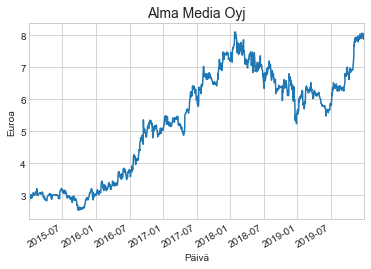

In [5]:
#Piirretään päätöskurssin aikasarjasta viivakuvio
alma['Closing price'].plot()
plt.title('Alma Media Oyj', fontsize=14)
plt.xlabel('Päivä')
plt.ylabel('Euroa')

Text(0, 0.5, 'Euroa')

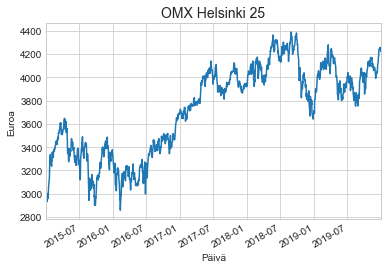

In [6]:
#Piirretään markkinoiden aikasarjasta viivakuvio
markkinat['Closing price'].plot()
plt.title('OMX Helsinki 25', fontsize=14)
plt.xlabel('Päivä')
plt.ylabel('Euroa')

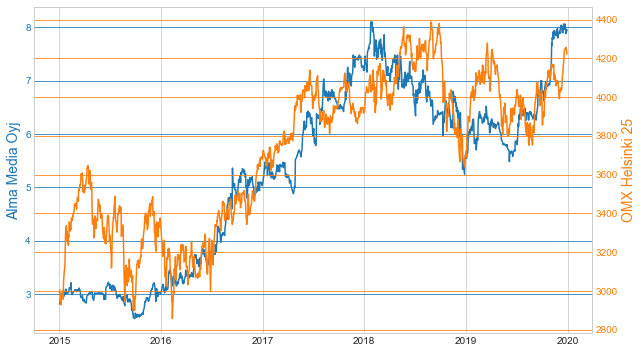

In [7]:
#Piirretään päätöskurssit ja markkinoiden aikasarjat samaan viivakuvioon

#Luodaan figure- ja axes-oliot
fig1, ax1 = plt.subplots(figsize = (10, 6))

#Määritetään ax1-olio:
color = 'C0'
ax1.set_ylabel('Alma Media Oyj', color=color, fontsize=14)
ax1.plot(alma['Closing price'], color=color)
ax1.tick_params(axis='y', labelcolor=color, grid_color=color)

#Luodaan toinen axes-olio, jolla on yhteinen x-akseli ax1-olion kanssa:
ax2 = ax1.twinx()

color = 'C1'
ax2.set_ylabel('OMX Helsinki 25', color=color, fontsize=14)
ax2.plot(markkinat['Closing price'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)

Text(0, 0.5, 'Euroa')

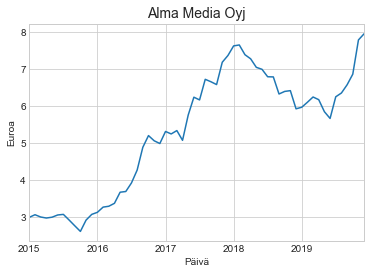

In [8]:
#kuukausittaiset keskiarvohinnat
alma['Closing price'].resample('M').mean().plot()
plt.title('Alma Media Oyj', fontsize=14)
plt.xlabel('Päivä')
plt.ylabel('Euroa')

Text(0, 0.5, 'Euroa')

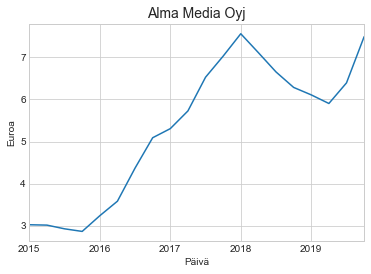

In [9]:
#vuosineljännesten keskiarvohinnat
alma['Closing price'].resample('Q').mean().plot()
plt.title('Alma Media Oyj', fontsize=14)
plt.xlabel('Päivä')
plt.ylabel('Euroa')

Text(0, 0.5, 'Euroa')

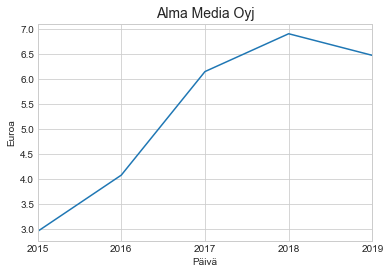

In [10]:
#vuosien keskiarvohinnat
alma['Closing price'].resample('Y').mean().plot()
plt.title('Alma Media Oyj', fontsize=14)
plt.xlabel('Päivä')
plt.ylabel('Euroa')

Text(0.5, 0, 'Päivä')

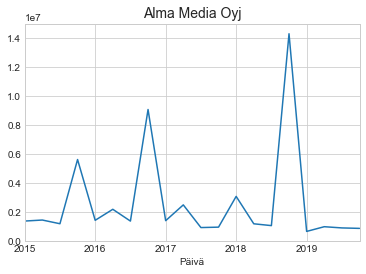

In [11]:
#vaihto osakkeiden lukumääränä vuosineljänneksittäin
alma['Total volume'].resample('Q').sum().plot()
plt.title('Alma Media Oyj', fontsize=14)
plt.xlabel('Päivä')

Text(0, 0.5, 'Euroa')

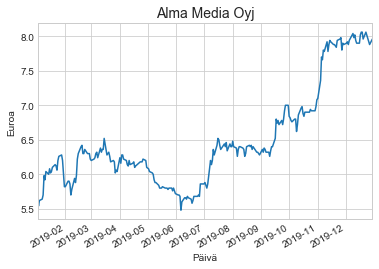

In [12]:
#päätöskurssit vuoden 2019 alusta
alma['Closing price']['2019':].plot()
plt.title('Alma Media Oyj', fontsize=14)
plt.xlabel('Päivä')
plt.ylabel('Euroa')

<h2>Päivämuutokset tuottoprosentteina</h2>

Prosenttimuutokset lasketaan Pandas-kirjaston <b>pct_change()</b>-funktiolla ja ne yhdistetään samaan dataframeen <b>concat()</b>-funktiolla.

In [13]:
#Lasketaan muutokset
alma['Alma Median päivämuutosprosentti'] = alma['Closing price'].pct_change()
markkinat['Markkinoiden päivämuutosprosentti'] = markkinat['Closing price'].pct_change()
muutokset = pd.concat([alma['Alma Median päivämuutosprosentti'], markkinat['Markkinoiden päivämuutosprosentti']], axis=1)

#Muutetaan luvut prosenteiksi ja pyöristetään kahden desimaalin tarkkuuteen
muutokset['Alma Median päivämuutosprosentti'] = pd.Series(["{0:.2f} %".format(val * 100) for val in muutokset['Alma Median päivämuutosprosentti']], index = muutokset.index)
muutokset['Markkinoiden päivämuutosprosentti'] = pd.Series(["{0:.2f} %".format(val * 100) for val in muutokset['Markkinoiden päivämuutosprosentti']], index = muutokset.index)

#Tulostetaan muutokset-taulukko
muutokset

,Alma Median päivämuutosprosentti,Markkinoiden päivämuutosprosentti
Date,,
2015-01-02,nan %,nan %
2015-01-05,3.91 %,-1.98 %
2015-01-07,3.08 %,-0.60 %
2015-01-08,-0.33 %,1.88 %
2015-01-09,-0.33 %,-0.56 %
...,...,...
2019-12-19,0.00 %,0.50 %
2019-12-20,-1.24 %,0.96 %
2019-12-23,1.26 %,0.28 %


Text(0, 0.5, 'Päivämuutosprosentti')

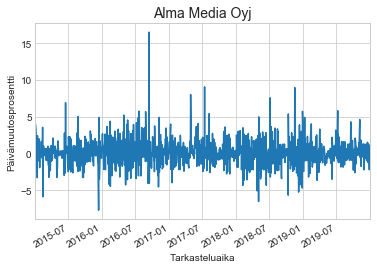

In [14]:
muutos = alma['Closing price'].pct_change()*100
muutos.plot()
plt.title('Alma Media Oyj', fontsize=14)
plt.xlabel('Tarkasteluaika')
plt.ylabel('Päivämuutosprosentti')

Text(0, 0.5, 'Päivämuutosprosentti')

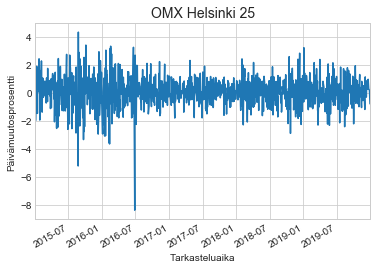

In [15]:
muutos = markkinat['Closing price'].pct_change()*100
muutos.plot()
plt.title('OMX Helsinki 25', fontsize=14)
plt.xlabel('Tarkasteluaika')
plt.ylabel('Päivämuutosprosentti')

Text(0.5, 0, 'Tarkasteluaika')

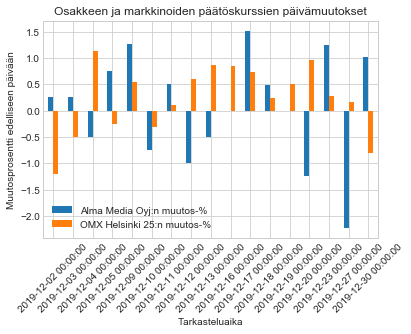

In [16]:
#Tehdään muutoksista joulukuun 2019 alusta alkaen pylväskuvio

alma['Alma Media Oyj:n muutos-%'] = alma['Closing price'].pct_change()*100
markkinat['OMX Helsinki 25:n muutos-%'] = markkinat['Closing price'].pct_change()*100
muutosprosentit100 = pd.concat([alma['Alma Media Oyj:n muutos-%'], markkinat['OMX Helsinki 25:n muutos-%']], axis=1)

ax3 = muutosprosentit100['2019-12-01':].plot.bar(rot=45) #joulukuun alusta ja vaaka-akselin teksti 45 asteen kulmassa
ax3.set_ylabel('Muutosprosentti edelliseen päivään')
ax3.set_title('Osakkeen ja markkinoiden päätöskurssien päivämuutokset')
ax3.set_xlabel('Tarkasteluaika')

In [17]:
#Lasketaan, miten muutosprosentit korreloivat:
alma['Alma_change'] = alma['Closing price'].pct_change()
markkinat['Markkinat_change'] = markkinat['Closing price'].pct_change()
pd.concat([alma['Alma_change'], markkinat['Markkinat_change']], axis=1).corr()

,Alma_change,Markkinat_change
Alma_change,1.000000,0.244071
Markkinat_change,0.244071,1.000000


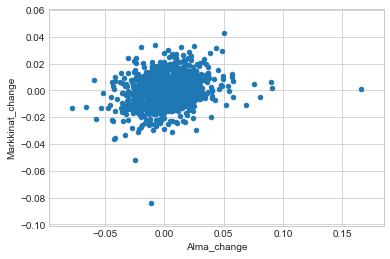

In [18]:
#Muutosprosenttien korrelaatio hajontakuviossa
muutosprosentit1 = pd.concat([alma['Alma_change'], markkinat['Markkinat_change']], axis=1)
muutosprosentit1.plot.scatter(x='Alma_change', y='Markkinat_change')

Text(0.5, 0, 'Tarkasteluaika')

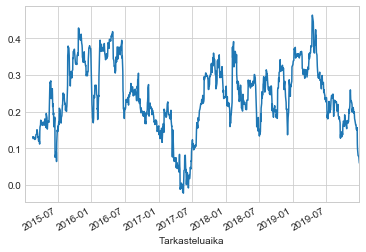

In [19]:
#Liukuva korrelaatio kertoo, miten Alma Median ja OMX Helsinki 25 -indeksin muutosprosentti korreloivat eri aikoina:
korrelaatio = alma['Alma_change'].rolling(90,min_periods=30).corr(markkinat['Markkinat_change'])
korrelaatio.plot()
plt.xlabel('Tarkasteluaika')

In [20]:
#Onko viikonpäivällä yhteyttä Alma Median tuottoprosenttiin?

#Viikonpäivät omaan sarakkeeseen (0=maanantai, ..., 4=perjantai)
muutosprosentit1['Weekday'] = muutosprosentit1.index.weekday
muutosprosentit1.groupby('Weekday')['Alma_change'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,250.0,0.000250,0.016845,-0.077419,-0.008505,0.000000,0.010084,0.058020
1,253.0,0.000614,0.016199,-0.044910,-0.009259,0.000000,0.008119,0.050360
2,255.0,0.000215,0.018892,-0.051075,-0.009431,0.000000,0.007081,0.165217
3,251.0,0.000131,0.018690,-0.065574,-0.009390,0.000000,0.009674,0.090598
4,245.0,0.003821,0.018896,-0.059190,-0.004132,0.002825,0.011538,0.089744


<h2>Liukuva keskiarvo</h2>

<p>Liukuva keskiarvo tasoittaa aikasarjan satunnaista vaihtelua.</p>

<p><b>Rolling()</b>-funktiolla voin laskea liukuvia keskiarvoja haluamalleni aikavälille.</p>

(736695.0, 737423.0)

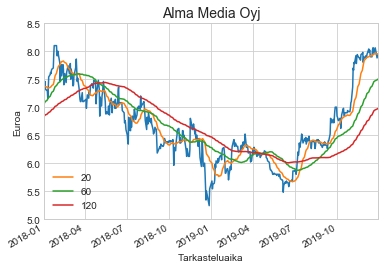

In [21]:
#Piirretään samaan kuvaan viivakuvio päätöskursseista ja niiden 20, 60 ja 120 havainnon liukuva keskiarvo
alma['Closing price'].plot()
alma['Closing price'].rolling(20).mean().plot(label='20', legend=True)
alma['Closing price'].rolling(60).mean().plot(label='60', legend=True)
alma['Closing price'].rolling(120).mean().plot(label='120', legend=True)
plt.title('Alma Media Oyj', fontsize=14)
plt.xlabel('Tarkasteluaika')
plt.ylabel('Euroa')
plt.ylim(5,8.5)
#Asetetaan kuvion x-akseli alkamaan vuodesta 2018
datemin = pd.to_datetime('1.1.2018', dayfirst=True)
plt.xlim(left=datemin)

<h2>Liukuva volatiliteetti</h2>
<p>Volatiliteetti kertoo osakkeeseen sisältyvästä riskistä. Seuraavasta selviää, miten riski on vaihdellut ajan kuluessa.</p>

Text(0.5, 0, 'Tarkasteluaika')

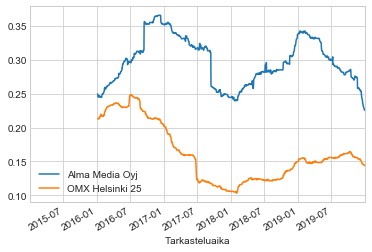

In [22]:
#Lasketaan ja piirretään Alma Median osakkeen ja markkinoiden volatiliteetti:
(alma['Alma_change'].rolling(252).std()*(252**0.5)).plot(label='Alma Media Oyj', legend=True)
(markkinat['Markkinat_change'].rolling(252).std()*(252**0.5)).plot(label='OMX Helsinki 25', legend=True)
plt.xlabel('Tarkasteluaika')